In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset 

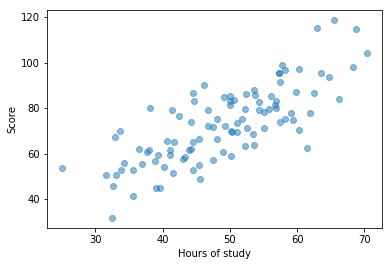

In [2]:
points = np.genfromtxt("data.csv", delimiter=",")
x = points[ : , 0] # get x hours of study
y = points[ : , 1] # get y exam score

#plt.xkcd()
#plt.figure(figsize=(6,6))
plt.xlabel('Hours of study')
plt.ylabel('Score')
plt.scatter(x, y, alpha=0.5)
plt.show()


# Linear Regression -> SK Learn

In [3]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
# Train the model using the training sets
x = x.reshape(-1, 1)

regr.fit(x, y)
m = regr.coef_
b = regr.intercept_
# The coefficients
print('Formula y= {0}x + {1}'.format( m, b) )



Formula y= [ 1.32243102]x + 7.991020982270399


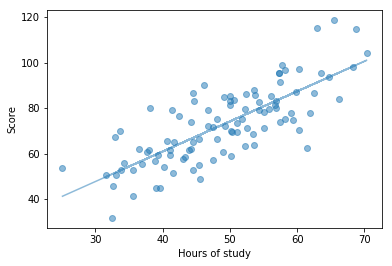

In [4]:

#plt.figure(figsize=(6,6))
plt.xlabel('Hours of study')
plt.ylabel('Score')
plt.scatter(x, y, alpha=0.5)
plt.plot(x, m * x + b , alpha=0.5)
plt.show()

# Linear Regression: gradient descent -> Siraj Raval Video

In [5]:
from GradientDescent1 import *

learning_rate = 0.00001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 1000
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points( initial_b, initial_m, points)))
print("Running...")
[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 0.0350749501965312, m = 1.4788027179317091, error = 112.64705665514039


## After Gradient Descent

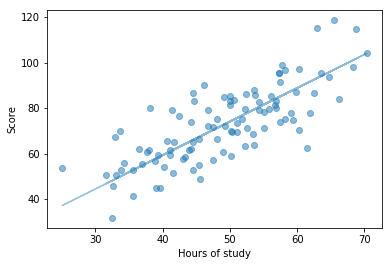

In [6]:
def f(b, m, x):
    return m * x + b

#plt.figure(figsize=(6,6))
plt.xlabel('Hours of study')
plt.ylabel('Score')
plt.scatter(x, y, alpha=0.5)
plt.plot(x, f(b,m,x), alpha=0.5)
plt.show()

# Linear Regression: batch gradient descent -> Andrew Ng

![title](img/andrew-ng-ml.jpg)
![title](img/formulas.png)

In [7]:
from myDescent import *

learning_rate = 0.00001
initial_t0 = 0 # initial y-intercept guess
initial_t1 = 0 # initial slope guess
num_iterations = 1000

print("Starting gradient descent at b = {0}(theta0), m = {1}(theta1), error = {2}"\
      .format(initial_t0, initial_t1, cost_SSE( points, initial_t0, initial_t1)))

[b, m, iter] = gradient_descent(points, initial_t0, initial_t1, learning_rate, 100000, 0.001 )
print("After {0} iterations, b = {1}(theta0), m = {2}(theta1), error = {3}"\
      .format(iter, b, m, cost_SSE( points, b, m)))

Starting gradient descent at b = 0(theta0), m = 0(theta1), error = 27825539.172416057
Converged, iterations:  343 !!!
After 344 iterations, b = 0.03009636477130381(theta0), m = 1.4786493382106343(theta1), error = 563251.0130747975


### Comparing Cost Function Formulas
##### SumSquared Error  VS SSE / (2*m)

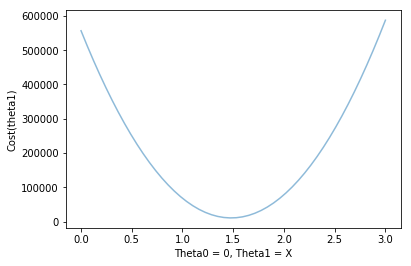

In [8]:
def cost(t0, t1):
    J = sum([(0 + t1* points[i, 0] - points[i, 1])**2 for i in range(0 , len(points))])
    return J

_x = np.linspace(0, 3.0)
plt.xlabel('Theta0 = 0, Theta1 = X')
plt.ylabel('Cost(theta1)')
plt.plot( _x, cost(0, _x), alpha=0.5)
plt.show()

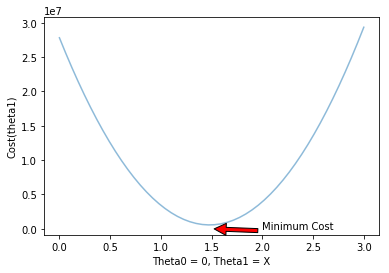

In [9]:
def cost(t0, t1):
    J = sum([(t0 + t1* points[i, 0] - points[i, 1])**2 for i in range(0 , len(points))])
    return 1.0 / 2*float(len(points)) * J

_x = np.linspace(0, 3.0)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.annotate('Minimum Cost', xy=(1.5, 0), xytext=(2, 2), arrowprops=dict(facecolor='red', shrink=0.05))

plt.xlabel('Theta0 = 0, Theta1 = X')
plt.ylabel('Cost(theta1)')
plt.plot(_x, cost(0, _x), alpha=0.5)
plt.show()

## After Gradient Descent

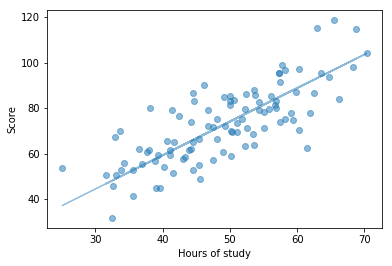

In [10]:
def f(b, m, x):
    return m * x + b

plt.xlabel('Hours of study')
plt.ylabel('Score')
plt.scatter(x, y, alpha=0.5)
plt.plot(x, f(b,m,x), alpha=0.5)
plt.show()

# Playing with Numpy matrix

In [12]:
def gradient_descent_2(alpha, points, numIterations):
    m = len(points) # number of samples

    theta = np.ones((2,1))
    x= points[ : , 0] # get all x values from dataset
    y= points[ : , 1] # get all y values from dataset
    x = np.c_[ np.ones(m), x] # insert column
    y = np.c_[y]
    x_transpose = x.transpose()
    #print(x, theta)
    for iter in range(0, 1000000):
        hypothesis = np.dot(x, theta)
        #print(hypothesis,y)
        loss = np.subtract(hypothesis , y)
        #print(loss)
        J = np.sum(loss ** 2) / (2 * m)  # cost
        #print ("iter %s | J: %.3f" % (iter, J))      
        gradient = np.dot(x_transpose, loss) / m  
        #print(gradient)
        theta = theta - alpha * gradient  # update
        
    return theta


In [13]:
theta = gradient_descent_2(0.0001, points, 1000)
print('Obtained y = {0} + {1} x'.format(theta[0][0], theta[1][0]))

Obtained y = 7.830694849048595 + 1.3255821840543294 x


### Tips for Gradient Descent

#### This section lists some tips and tricks for getting the most out of the gradient descent algorithm for machine learning.

 - Plot Cost versus Time: Collect and plot the cost values calculated by the algorithm each iteration. The expectation for a well performing gradient descent run is a decrease in cost each iteration. If it does not decrease, try reducing your learning rate.
 - Learning Rate: The learning rate value is a small real value such as 0.1, 0.001 or 0.0001. Try different values for your problem and see which works best.
 - Rescale Inputs: The algorithm will reach the minimum cost faster if the shape of the cost function is not skewed and distorted. You can achieved this by rescaling all of the input variables (X) to the same range, such as [0, 1] or [-1, 1].
 - Few Passes: Stochastic gradient descent often does not need more than 1-to-10 passes through the training dataset to converge on good or good enough coefficients.
 - Plot Mean Cost: The updates for each training dataset instance can result in a noisy plot of cost over time when using stochastic gradient descent. Taking the average over 10, 100, or 1000 updates can give you a better idea of the learning trend for the algorithm.